In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
df=pd.read_csv(r"C:\Users\Shahziab\Desktop\data analytics\python\insurance\insurance.csv")

In [60]:
df.shape

(1338, 7)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
check_null=df.isnull().sum()
check_null

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [66]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [68]:
df1=df.copy()

In [76]:
df1=df1.drop_duplicates()

In [78]:
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [82]:
Numerical_column=df1.select_dtypes(include="number").columns.to_list()
Categorical_column=df1.select_dtypes(exclude="number").columns.to_list()
print('Numerical column: ',Numerical_column)
print('Categorical column: ',Categorical_column)

Numerical column:  ['age', 'bmi', 'children', 'charges']
Categorical column:  ['sex', 'smoker', 'region']


In [86]:
df1.describe(include='number')

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [88]:
df1.describe(exclude='number')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [90]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

In [92]:
df1.sex.nunique()

2

In [96]:
df1.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [102]:
print(df1.smoker.unique())
print()
print(df1.smoker.nunique())
print()
print(df1.smoker.value_counts())

['yes' 'no']

2

smoker
no     1063
yes     274
Name: count, dtype: int64


In [106]:
print(df1.region.unique())
print()
print(df1.region.nunique())
print()
print(df1.region.value_counts())

['southwest' 'southeast' 'northwest' 'northeast']

4

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [110]:
Numerical_column

['age', 'bmi', 'children', 'charges']

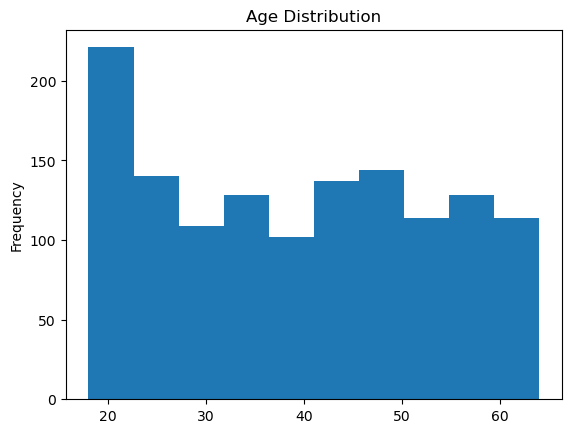

In [112]:
df1['age'].plot(kind='hist')
plt.title('Age Distribution')
plt.show()

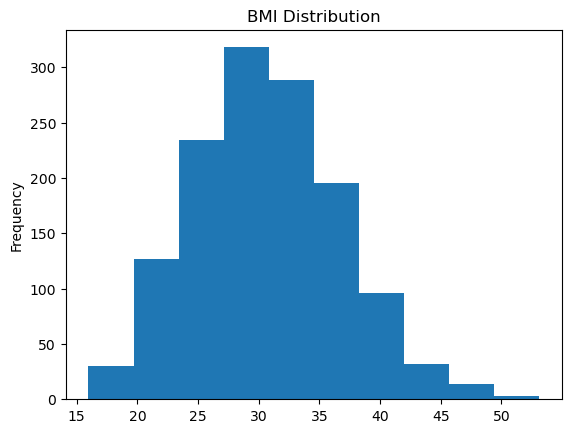

In [114]:
df1['bmi'].plot(kind='hist')
plt.title('BMI Distribution')
plt.show()

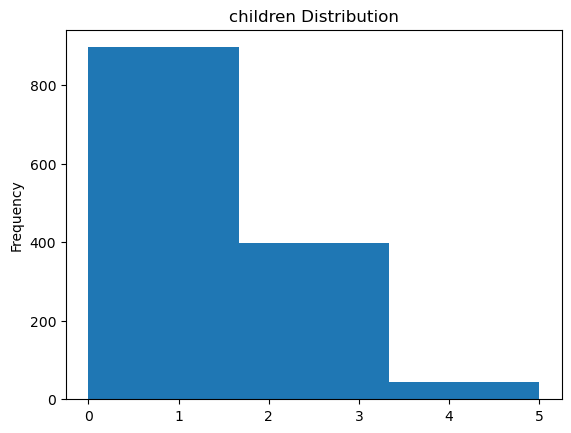

In [116]:
df1['children'].plot(kind='hist', bins=3)
plt.title('children Distribution')
plt.show()

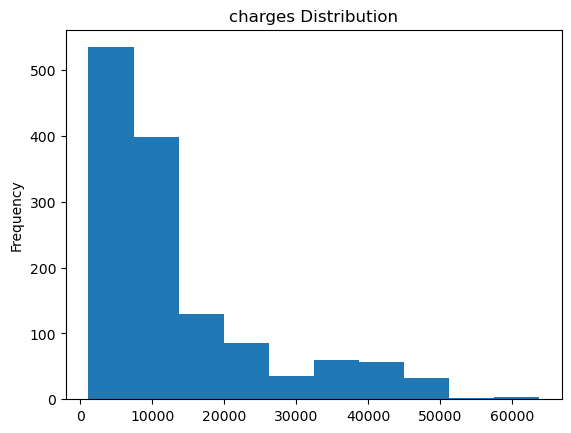

In [118]:
df1['charges'].plot(kind='hist')
plt.title('charges Distribution')
plt.show()

<Axes: xlabel='children'>

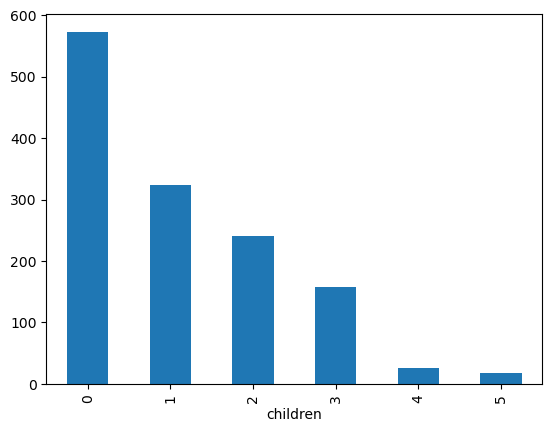

In [120]:
df1['children'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

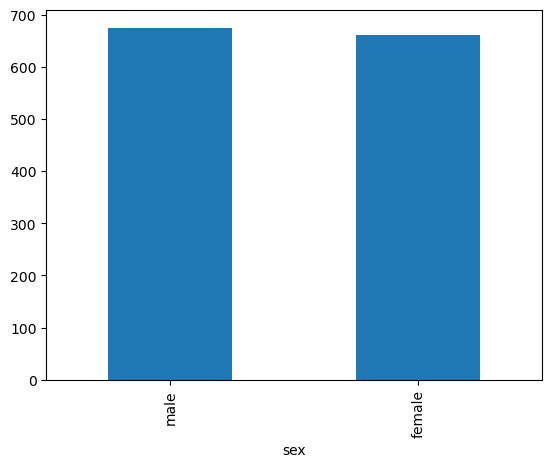

In [122]:
df1['sex'].value_counts().plot(kind= 'bar')

<Axes: xlabel='region'>

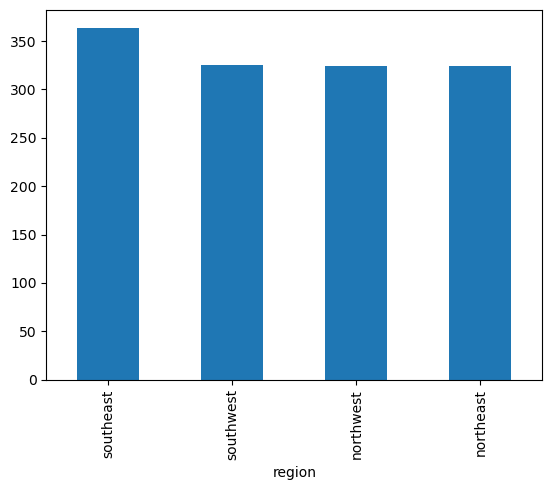

In [124]:
df1['region'].value_counts().plot(kind='bar')

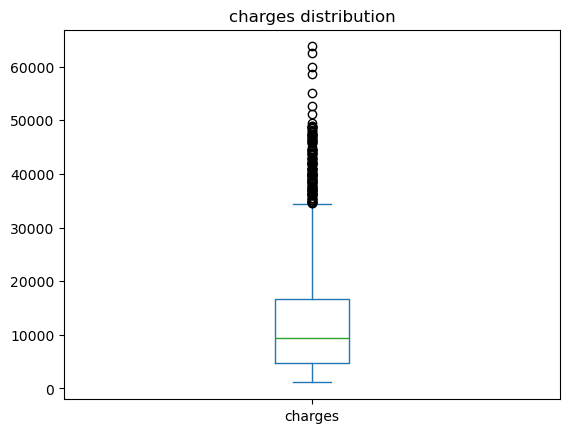

In [126]:
df1['charges'].plot(kind='box')
plt.title('charges distribution')
plt.show()

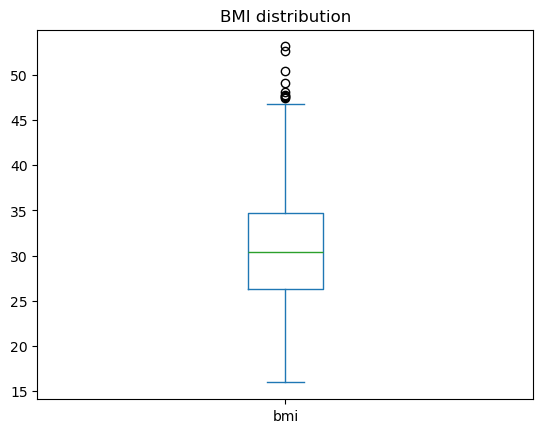

In [130]:
df1['bmi'].plot(kind='box')
plt.title('BMI distribution')
plt.show()

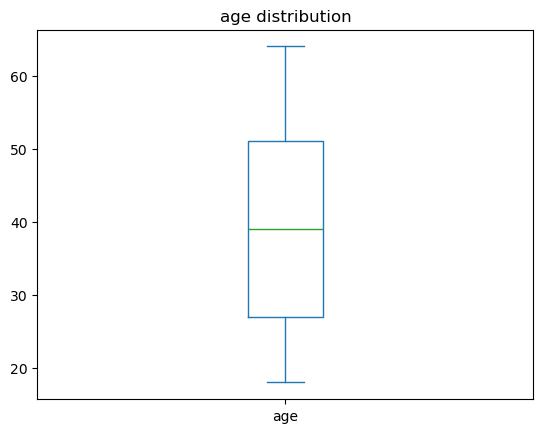

In [132]:
df1['age'].plot(kind='box')
plt.title('age distribution')
plt.show()

In [134]:
region_count=df1['region'].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

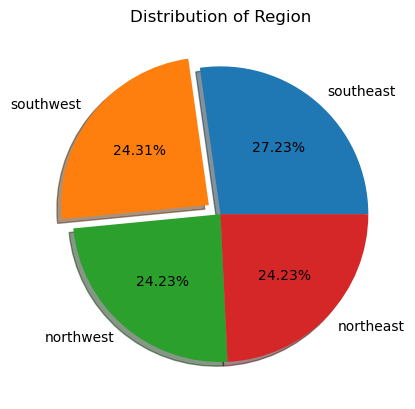

In [136]:
plt.pie(labels=region_count.index,
        x=region_count.values,
        shadow=True,
        autopct='%.2f%%',
        explode=(0,0.1,0,0))
plt.title('Distribution of Region')
plt.show()

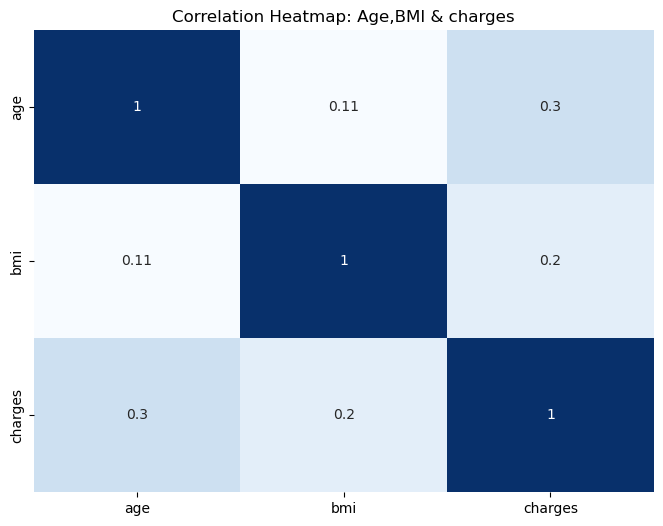

In [140]:
corr_data=df1[['age','bmi','charges']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(round(corr_data,2),annot=True,cmap='Blues',cbar=False)
plt.title('Correlation Heatmap: Age,BMI & charges')
plt.show()

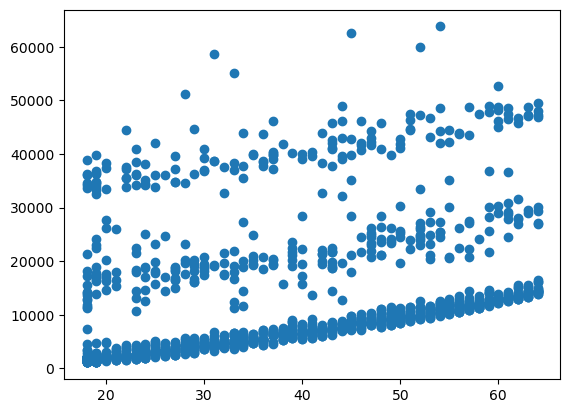

In [142]:
plt.scatter(data=df1,x='age',y='charges')

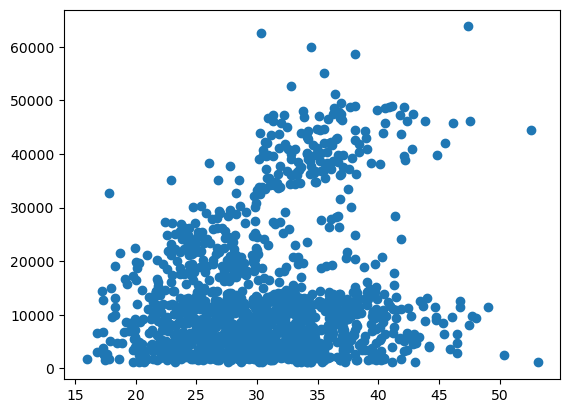

In [144]:
plt.scatter(data=df1,x='bmi',y='charges')

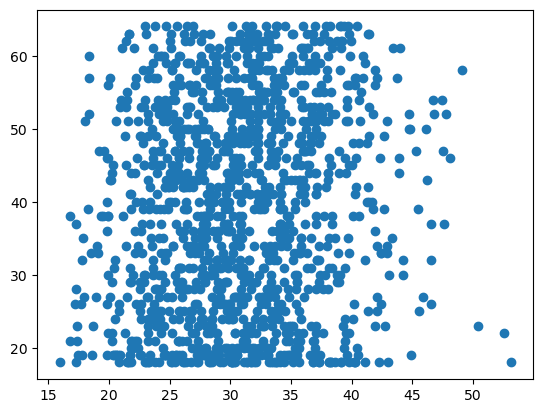

In [148]:
plt.scatter(data=df1,x='bmi',y='age')

In [150]:
smoker_df=df1.groupby('smoker')['charges'].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

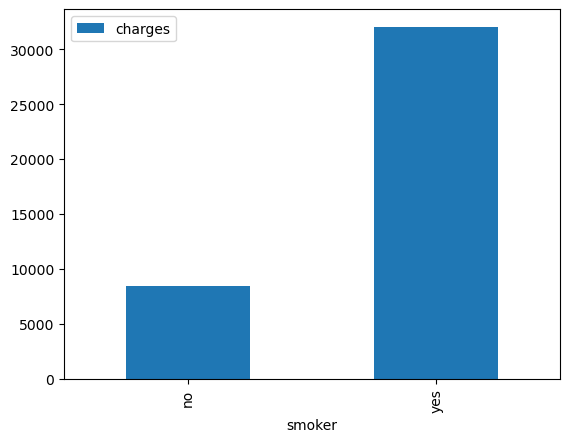

In [152]:
smoker_df.plot(kind='bar',x='smoker',y='charges')

In [154]:
gender_df=df1.groupby('sex')['charges'].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

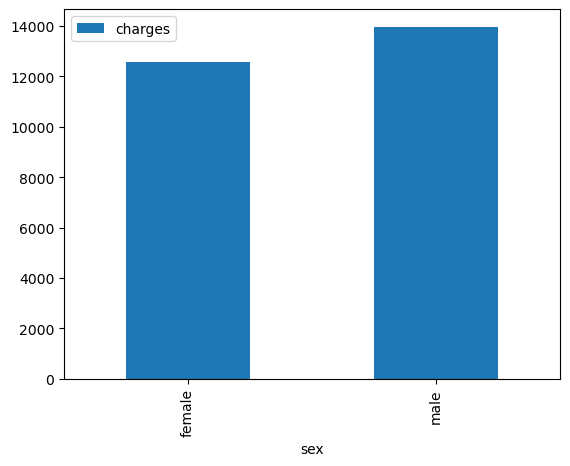

In [156]:
gender_df.plot(kind='bar',x='sex',y='charges')

In [158]:
region_df=df1.groupby('region')['charges'].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

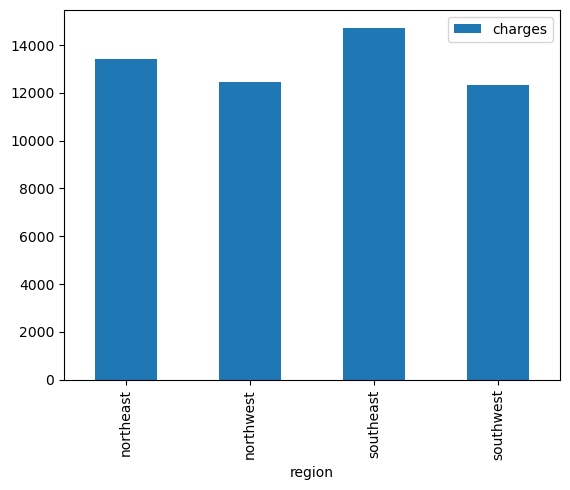

In [160]:
region_df.plot(kind='bar',x='region',y='charges')

In [162]:
region_bmi_df=df1.groupby('region')['bmi'].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

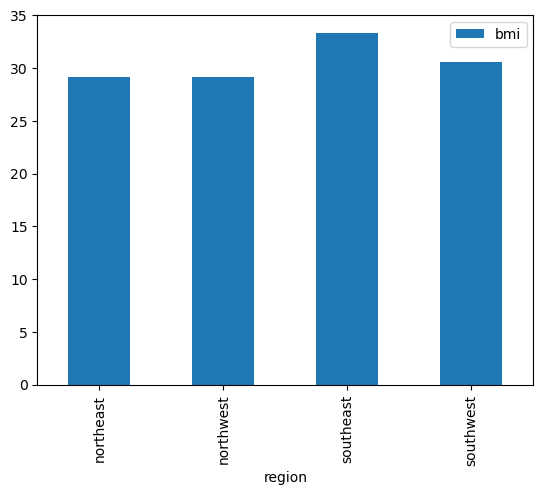

In [176]:
region_bmi_df.plot(kind='bar', x='region', y='bmi')
